In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

(<matplotlib.image.AxesImage at 0x7ff208426250>, (-0.5, 649.5, 409.5, -0.5))

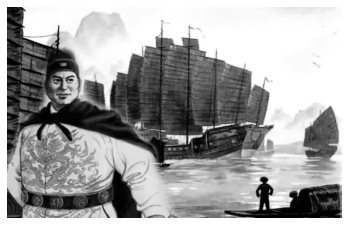

In [4]:
ref = '/content/gdrive/MyDrive/Year 3/Computer Vision/Project/Challenge2/reference.jpg'
ref = cv2.imread(ref)
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
plt.imshow(ref, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff20675b850>, (-0.5, 649.5, 409.5, -0.5))

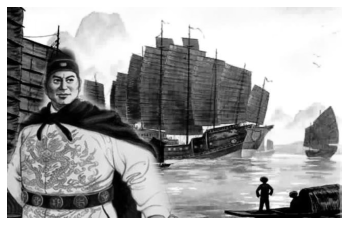

In [5]:
tmp = '/content/gdrive/MyDrive/Year 3/Computer Vision/Project/Challenge2/template.jpg'
tmp = cv2.imread(tmp)
tmp = cv2.cvtColor(tmp,cv2.COLOR_BGR2GRAY)
plt.imshow(tmp, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff205c33370>, (-0.5, 649.5, 409.5, -0.5))

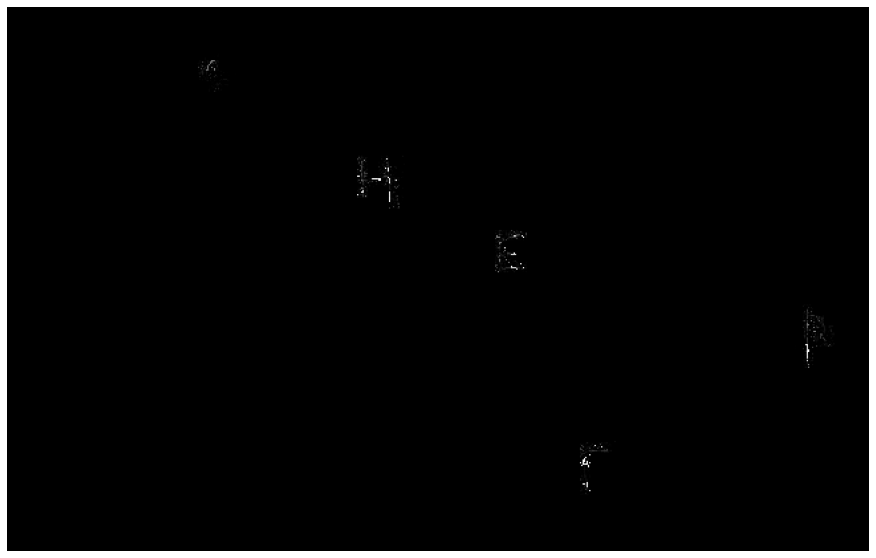

In [8]:
differences = cv2.bitwise_xor(tmp,ref)
plt.figure(figsize = (20,10))
plt.imshow(differences, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff205be44f0>, (-0.5, 649.5, 409.5, -0.5))

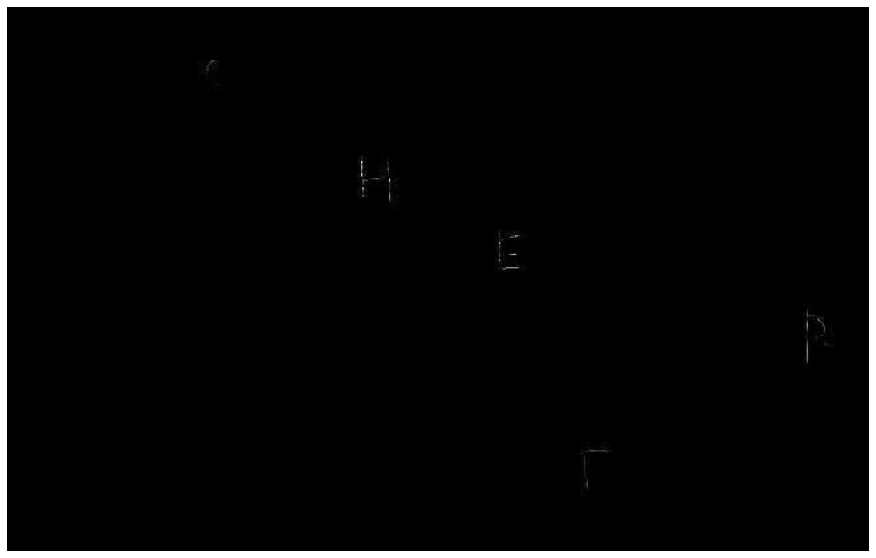

In [9]:
differences = cv2.absdiff(tmp,ref)
plt.figure(figsize = (20,10))
plt.imshow(differences, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff205bba880>, (-0.5, 649.5, 409.5, -0.5))

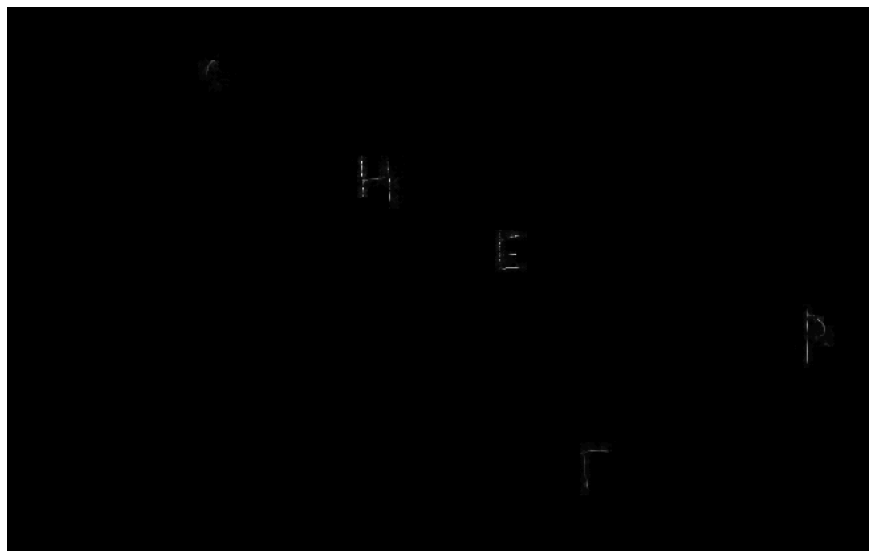

In [10]:
# join the broekn lines - closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
close = cv2.morphologyEx(differences, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize = (20,10))
plt.imshow(close, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff2050e8310>, (-0.5, 649.5, 409.5, -0.5))

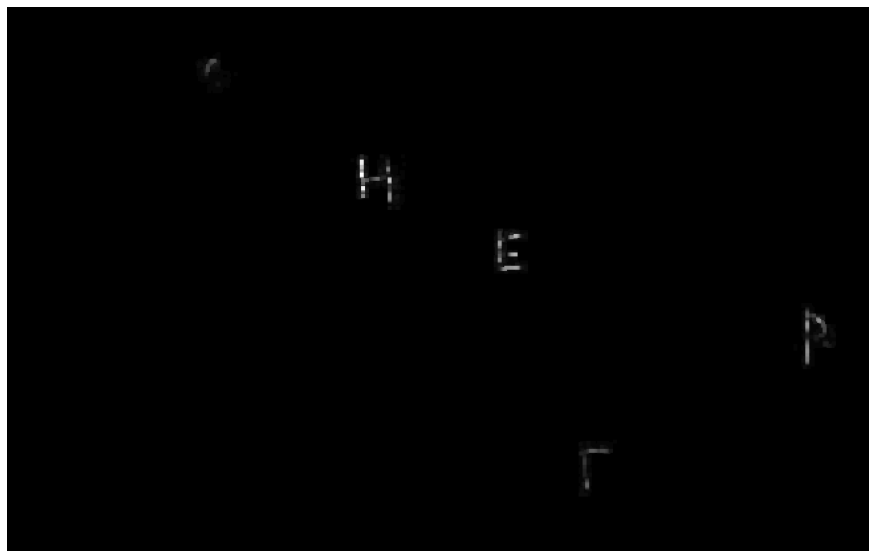

In [44]:
# join the broekn lines - dilation
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(differences,kernel,iterations = 1)
plt.figure(figsize = (20,10))
plt.imshow(dilation, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff2056ebdf0>, (-0.5, 649.5, 409.5, -0.5))

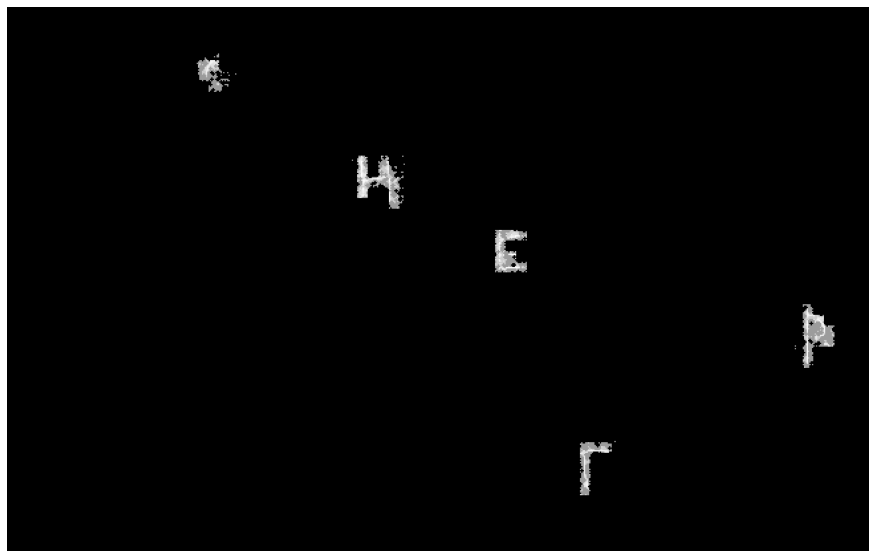

In [23]:
## histogram equalization - closing
img_close = cv2.equalizeHist(close)
plt.figure(figsize = (20,10))
plt.imshow(img_close, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff2050b0a90>, (-0.5, 649.5, 409.5, -0.5))

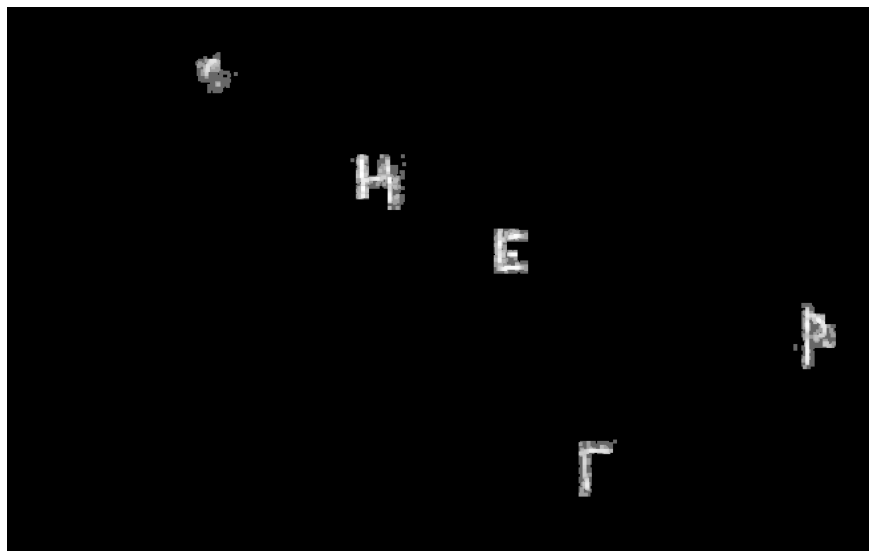

In [45]:
## histogram equalization - dilation
img_dilate = cv2.equalizeHist(dilation)
plt.figure(figsize = (20,10))
plt.imshow(img_dilate, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff205488310>, (-0.5, 649.5, 409.5, -0.5))

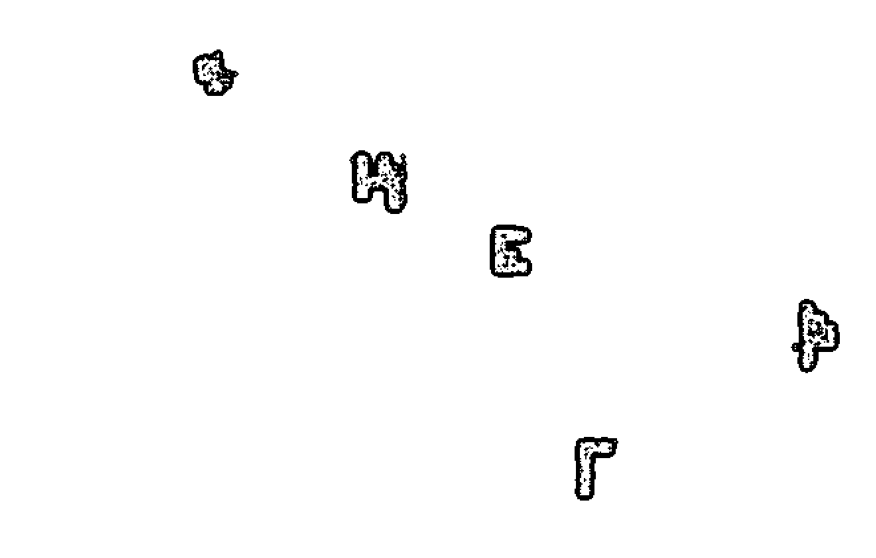

In [32]:
# ADAPTIVE THRESHOLDING - closing
thresh2 = cv2.adaptiveThreshold(img_close, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,4)
plt.figure(figsize = (20,10))
plt.imshow(thresh2, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7ff204fa89a0>, (-0.5, 649.5, 409.5, -0.5))

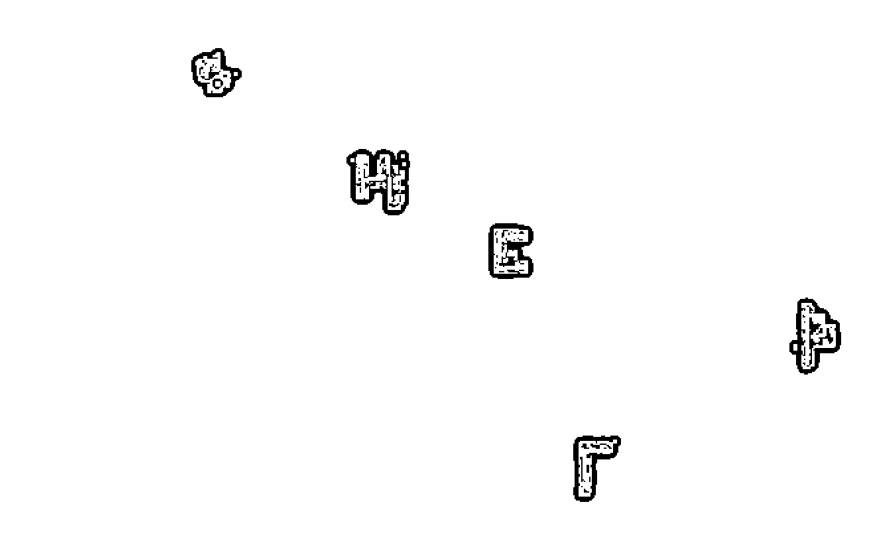

In [48]:
# ADAPTIVE THRESHOLDING - dilation
thresh2 = cv2.adaptiveThreshold(img_dilate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,4)
plt.figure(figsize = (20,10))
plt.imshow(thresh2, cmap='gray'), plt.axis('off')